# MLPS Project - Suryaa's work

## Read dataset and null checks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression,LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier

In [3]:
covid_data = pd.read_csv("covidcast-1.csv")

In [4]:
covid_data.head()

,time_value,geo_value,smoothed_wspent_time_1d,smoothed_wtested_14d,smoothed_wpublic_transit_1d,smoothed_wworried_become_ill,smoothed_wvaccine_likely_govt_health,smoothed_wshop_1d,smoothed_wtested_positive_14d,smoothed_wwork_outside_home_1d,smoothed_wothers_masked,smoothed_wcli,smoothed_wcovid_vaccinated,smoothed_wvaccine_likely_friends,smoothed_wrestaurant_1d,smoothed_wvaccine_likely_politicians,smoothed_wvaccine_likely_who,smoothed_wwearing_mask,smoothed_wlarge_event_1d
0,1/7/2021,1000,34.412959,12.541558,1.464798,65.771681,22.086274,52.854667,29.288429,30.487852,57.334785,3.244379,2.6382,28.469582,18.571266,9.482316,24.962112,84.311759,12.627098
1,1/7/2021,1003,32.814153,10.189340,1.270183,61.516584,25.179399,51.160278,NaN,28.384842,53.172285,1.199572,NaN,27.532881,23.406516,8.933682,28.864558,82.778220,11.727249
2,1/7/2021,1015,35.621311,14.591271,6.594649,NaN,NaN,54.503711,NaN,37.003522,NaN,3.890709,NaN,NaN,20.974363,NaN,NaN,NaN,13.255336
3,1/7/2021,1051,40.453615,14.164503,3.320922,68.718538,19.438763,54.948755,NaN,37.637900,67.550815,3.284647,NaN,30.223647,20.009477,7.570250,26.494057,86.587182,13.823318
4,1/7/2021,1069,39.228766,10.103564,0.288897,59.961036,23.065494,60.118290,NaN,36.156326,55.995745,1.881970,NaN,30.806929,16.574756,12.916249,24.747620,85.825453,10.258936


In [5]:
# Select columns from covid data frame into new df
target_data = covid_data[['smoothed_wtested_positive_14d','smoothed_wcovid_vaccinated']]
target_data.isna().sum()

,0
smoothed_wtested_positive_14d,21632
smoothed_wcovid_vaccinated,2602


## Vaccination Analysis

In [6]:
# Store all the attributes of dataset as a list and print
attributes = list(covid_data.columns)
print(attributes)

['time_value', 'geo_value', 'smoothed_wspent_time_1d', 'smoothed_wtested_14d', 'smoothed_wpublic_transit_1d', 'smoothed_wworried_become_ill', 'smoothed_wvaccine_likely_govt_health', 'smoothed_wshop_1d', 'smoothed_wtested_positive_14d', 'smoothed_wwork_outside_home_1d', 'smoothed_wothers_masked', 'smoothed_wcli', 'smoothed_wcovid_vaccinated', 'smoothed_wvaccine_likely_friends', 'smoothed_wrestaurant_1d', 'smoothed_wvaccine_likely_politicians', 'smoothed_wvaccine_likely_who', 'smoothed_wwearing_mask', 'smoothed_wlarge_event_1d']


In [47]:
# Positive test dataset
belief_indicators = ['smoothed_wworried_become_ill', 'smoothed_wvaccine_likely_govt_health','smoothed_wcovid_vaccinated'\
                     ,'smoothed_wvaccine_likely_friends','smoothed_wvaccine_likely_politicians', 'smoothed_wvaccine_likely_who'\
                     ,'smoothed_wwearing_mask','smoothed_wwork_outside_home_1d','smoothed_wcli']
print(len(belief_indicators))

vaccine_data = covid_data[belief_indicators]

9


In [48]:
## Dataset size checks
print("Vaccine test data size: ", vaccine_data.shape, '\n', "Total data size: ", covid_data.shape)

Vaccine test data size:  (25626, 9) 
 Total data size:  (25626, 19)


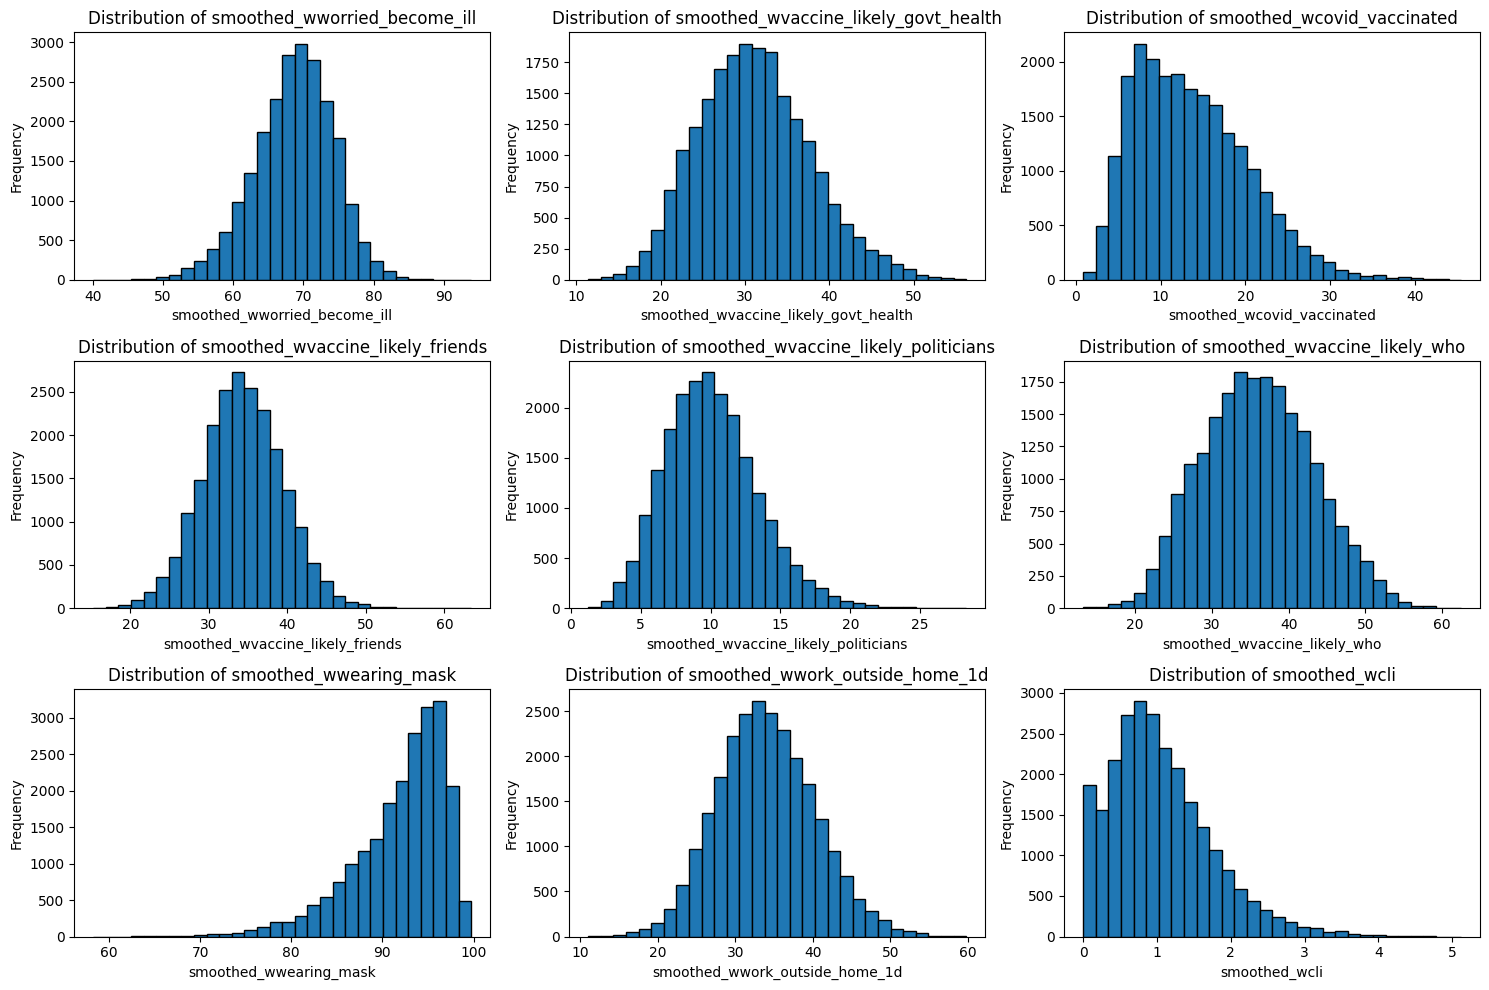

In [49]:
# Analyze data distribution of all attributes
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()
for i, col in enumerate(belief_indicators):
    if i < len(axes):
        axes[i].hist(vaccine_data[col], bins=30, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### Calculate correlation between independent variables and target variable smoothed_wcovid_vaccinated

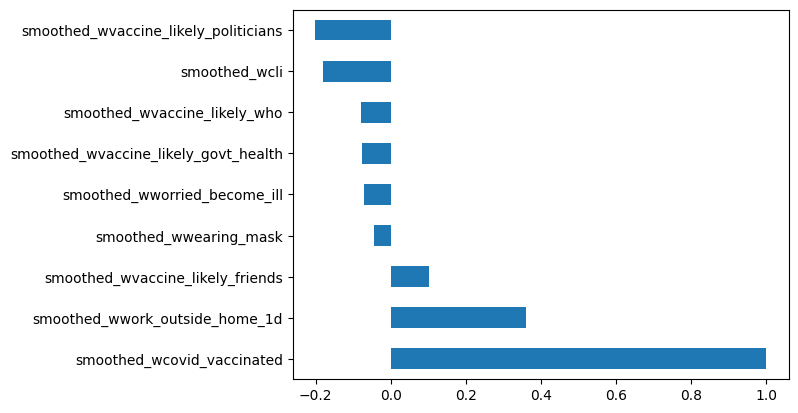

smoothed_wcovid_vaccinated              1.000000
smoothed_wwork_outside_home_1d          0.361256
smoothed_wvaccine_likely_friends        0.102281
smoothed_wwearing_mask                 -0.045118
smoothed_wworried_become_ill           -0.072175
smoothed_wvaccine_likely_govt_health   -0.076309
smoothed_wvaccine_likely_who           -0.078573
smoothed_wcli                          -0.180843
smoothed_wvaccine_likely_politicians   -0.200880
Name: smoothed_wcovid_vaccinated, dtype: float64


In [50]:
corr_matrix = vaccine_data.corr()
corr_matrix['smoothed_wcovid_vaccinated'].sort_values(ascending=False).plot(kind="barh")
plt.show()
print(corr_matrix['smoothed_wcovid_vaccinated'].sort_values(ascending=False))

In [51]:
# Keep only the features which have good correlation with target variable
vaccine_features_selected = vaccine_data[['smoothed_wcovid_vaccinated','smoothed_wwork_outside_home_1d','smoothed_wvaccine_likely_friends','smoothed_wcli','smoothed_wvaccine_likely_politicians']]

In [52]:
# Calculate null share
null_share = round(vaccine_features_selected.isna().sum()/vaccine_features_selected.shape[0],2)
print(null_share.sort_values(ascending=False))

smoothed_wvaccine_likely_politicians    0.18
smoothed_wvaccine_likely_friends        0.17
smoothed_wcovid_vaccinated              0.10
smoothed_wwork_outside_home_1d          0.02
smoothed_wcli                           0.01
dtype: float64


In [53]:
# I'm gonna handle missing values based on percentage
for column in vaccine_features_selected.columns:
    if null_share[column] < 0.05:
        vaccine_features_selected[column].fillna(vaccine_features_selected[column].median(), inplace=True)

    elif null_share[column] > 0.1:
       # Use median and add some noise
        median_val = vaccine_features_selected[column].median()
        std_val = vaccine_features_selected[column].std()
        missing_mask = vaccine_features_selected[column].isnull()

        # Fill with median + small random noise
        noise = np.random.normal(0, std_val * 0.1, missing_mask.sum())
        vaccine_features_selected.loc[missing_mask, column] = median_val + noise
    else:
        vaccine_features_selected[column].fillna(vaccine_features_selected[column].mean(), inplace=True)

null_share_updated = round(vaccine_features_selected.isna().sum()/vaccine_features_selected.shape[0],2)
print(null_share_updated.sort_values(ascending=False))

smoothed_wcovid_vaccinated              0.0
smoothed_wwork_outside_home_1d          0.0
smoothed_wvaccine_likely_friends        0.0
smoothed_wcli                           0.0
smoothed_wvaccine_likely_politicians    0.0
dtype: float64


<ipython-input-53-fa1854d70faf>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  vaccine_features_selected[column].fillna(vaccine_features_selected[column].mean(), inplace=True)
<ipython-input-53-fa1854d70faf>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vaccine_features_selected[column].fillna(vaccine_features_selected[column].mean(), i

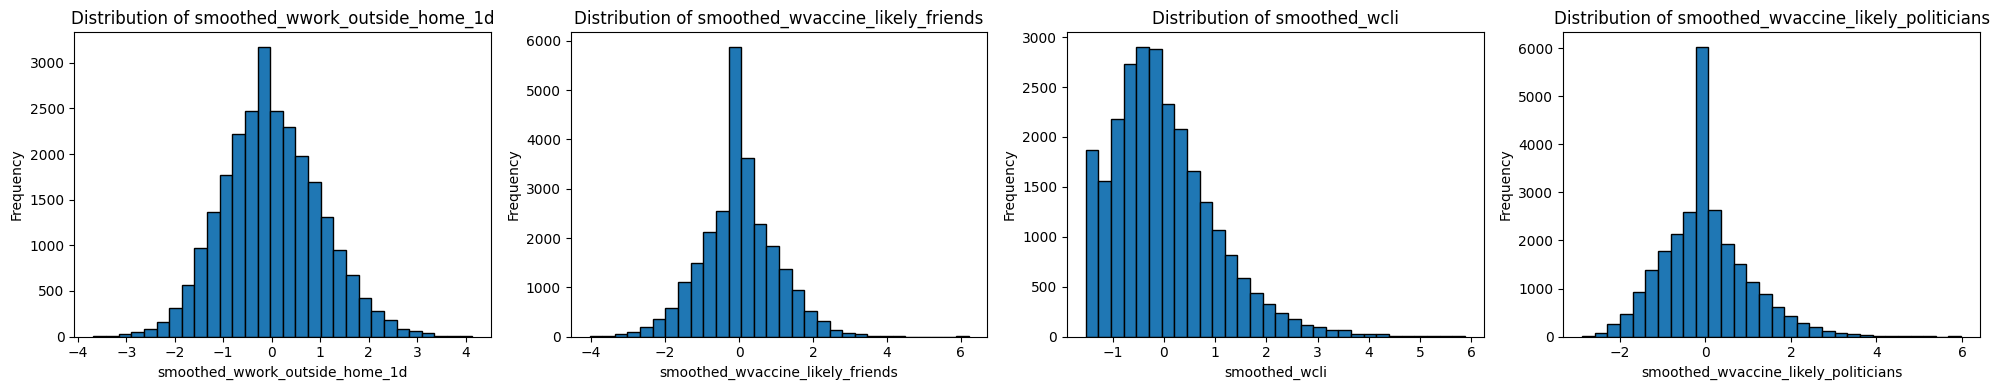

In [55]:
## Scale and normalize the data
scaler = StandardScaler()
vaccine_features_selected_ip = vaccine_features_selected.drop(columns=['smoothed_wcovid_vaccinated'])
vaccine_features_selected_scaled = scaler.fit_transform(vaccine_features_selected_ip)
vaccine_features_selected_scaled = pd.DataFrame(vaccine_features_selected_scaled, columns=vaccine_features_selected_ip.columns)

## Plot the histogram of them all
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
axes = axes.ravel()
for i, col in enumerate(vaccine_features_selected_scaled.columns):
    if i < len(axes):
        axes[i].hist(vaccine_features_selected_scaled[col], bins=30, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [57]:
# Train test split as 80:20
X = vaccine_features_selected_scaled
y = vaccine_features_selected['smoothed_wcovid_vaccinated']
X_vac_train, X_vac_test, y_vac_train, y_vac_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling for vaccination rate

In [58]:
# For tracking model performance
model_results = {
    'positive_cases': {},
    'vaccination': {}
}

# Regression models for vaccination
models_vaccination = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    # 'Neural Network': MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
}

# Cross-validation function
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
    # Train the model
    model.fit(X_train, y_train)

    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results = {
        'cv_rmse_mean': cv_rmse.mean(),
        'cv_rmse_std': cv_rmse.std(),
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'train_r2': train_r2,
        'test_r2': test_r2
    }

    return results, model

# Evaluate models for vaccination
print("\n===== Vaccination Prediction Results =====")
for name, model in models_vaccination.items():
    results, trained_model = evaluate_model(model, X_vac_train, y_vac_train, X_vac_test, y_vac_test)
    model_results['vaccination'][name] = results

    print(f"\n{name}:")
    print(f"CV RMSE: {results['cv_rmse_mean']:.3f} ± {results['cv_rmse_std']:.3f}")
    print(f"Train RMSE: {results['train_rmse']:.3f}")
    print(f"Test RMSE: {results['test_rmse']:.3f}")
    print(f"Train R²: {results['train_r2']:.3f}")
    print(f"Test R²: {results['test_r2']:.3f}")


===== Vaccination Prediction Results =====

Linear Regression:
CV RMSE: 5.743 ± 0.052
Train RMSE: 5.741
Test RMSE: 5.762
Train R²: 0.176
Test R²: 0.161

Ridge Regression:
CV RMSE: 5.743 ± 0.052
Train RMSE: 5.741
Test RMSE: 5.762
Train R²: 0.176
Test R²: 0.161

Lasso Regression:
CV RMSE: 5.747 ± 0.052
Train RMSE: 5.745
Test RMSE: 5.765
Train R²: 0.175
Test R²: 0.160

Random Forest:
CV RMSE: 5.702 ± 0.033
Train RMSE: 2.127
Test RMSE: 5.738
Train R²: 0.887
Test R²: 0.168

Gradient Boosting:
CV RMSE: 5.606 ± 0.054
Train RMSE: 5.498
Test RMSE: 5.639
Train R²: 0.244
Test R²: 0.196


In [59]:
# Add Kernel Methods to existing models_vaccination
from sklearn.kernel_ridge import KernelRidge
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Add kernel methods to models_vaccination
models_vaccination.update({
    'Kernel Ridge (RBF)': KernelRidge(kernel='rbf', alpha=1.0),
    'Kernel Ridge (Polynomial)': KernelRidge(kernel='poly', degree=2, alpha=1.0),
    'SVR (RBF)': SVR(kernel='rbf', C=1.0),
    'SVR (Polynomial)': SVR(kernel='poly', degree=2, C=1.0),
    'Polynomial Regression': Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression())
    ])
})

# Evaluate all models including kernel methods
print("\n===== Vaccination Prediction Results (including Kernel Methods) =====")
for name, model in models_vaccination.items():
    results, trained_model = evaluate_model(model, X_vac_train, y_vac_train, X_vac_test, y_vac_test)
    model_results['vaccination'][name] = results

    print(f"\n{name}:")
    print(f"CV RMSE: {results['cv_rmse_mean']:.3f} ± {results['cv_rmse_std']:.3f}")
    print(f"Train RMSE: {results['train_rmse']:.3f}")
    print(f"Test RMSE: {results['test_rmse']:.3f}")
    print(f"Train R²: {results['train_r2']:.3f}")
    print(f"Test R²: {results['test_r2']:.3f}")


===== Vaccination Prediction Results (including Kernel Methods) =====

Linear Regression:
CV RMSE: 5.743 ± 0.052
Train RMSE: 5.741
Test RMSE: 5.762
Train R²: 0.176
Test R²: 0.161

Ridge Regression:
CV RMSE: 5.743 ± 0.052
Train RMSE: 5.741
Test RMSE: 5.762
Train R²: 0.176
Test R²: 0.161

Lasso Regression:
CV RMSE: 5.747 ± 0.052
Train RMSE: 5.745
Test RMSE: 5.765
Train R²: 0.175
Test R²: 0.160

Random Forest:
CV RMSE: 5.702 ± 0.033
Train RMSE: 2.127
Test RMSE: 5.738
Train R²: 0.887
Test R²: 0.168

Gradient Boosting:
CV RMSE: 5.606 ± 0.054
Train RMSE: 5.498
Test RMSE: 5.639
Train R²: 0.244
Test R²: 0.196

Kernel Ridge (RBF):
CV RMSE: 5.588 ± 0.053
Train RMSE: 5.525
Test RMSE: 5.610
Train R²: 0.237
Test R²: 0.205

Kernel Ridge (Polynomial):
CV RMSE: 5.713 ± 0.055
Train RMSE: 5.710
Test RMSE: 5.740
Train R²: 0.185
Test R²: 0.168

SVR (RBF):
CV RMSE: 5.653 ± 0.062
Train RMSE: 5.620
Test RMSE: 5.680
Train R²: 0.210
Test R²: 0.185

SVR (Polynomial):
CV RMSE: 6.286 ± 0.073
Train RMSE: 6.285
Te

### Add hyperparameter tuning for Ridge and Lasso regression

In [60]:
# Tune Ridge Regression
ridge_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

ridge_grid = GridSearchCV(Ridge(),
                         ridge_param_grid,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1)
ridge_grid.fit(X_vac_train, y_vac_train)

print("\n===== Tuned Ridge Regression Results =====")
best_ridge = ridge_grid.best_estimator_
results_ridge, _ = evaluate_model(best_ridge, X_vac_train, y_vac_train, X_vac_test, y_vac_test)
model_results['vaccination']['Tuned Ridge Regression'] = results_ridge

print(f"Best alpha: {ridge_grid.best_params_['alpha']}")
print(f"Test RMSE: {results_ridge['test_rmse']:.3f}")
print(f"Test R²: {results_ridge['test_r2']:.3f}")

# Tune Lasso Regression
lasso_param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
}

lasso_grid = GridSearchCV(Lasso(max_iter=10000),
                         lasso_param_grid,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1)
lasso_grid.fit(X_vac_train, y_vac_train)

print("\n===== Tuned Lasso Regression Results =====")
best_lasso = lasso_grid.best_estimator_
results_lasso, _ = evaluate_model(best_lasso, X_vac_train, y_vac_train, X_vac_test, y_vac_test)
model_results['vaccination']['Tuned Lasso Regression'] = results_lasso

print(f"Best alpha: {lasso_grid.best_params_['alpha']}")
print(f"Test RMSE: {results_lasso['test_rmse']:.3f}")
print(f"Test R²: {results_lasso['test_r2']:.3f}")


===== Tuned Ridge Regression Results =====
Best alpha: 10.0
Test RMSE: 5.762
Test R²: 0.161

===== Tuned Lasso Regression Results =====
Best alpha: 0.0001
Test RMSE: 5.762
Test R²: 0.161



Features selected by Lasso: ['smoothed_wwork_outside_home_1d', 'smoothed_wvaccine_likely_friends', 'smoothed_wcli', 'smoothed_wvaccine_likely_politicians']
Number of features selected: 4


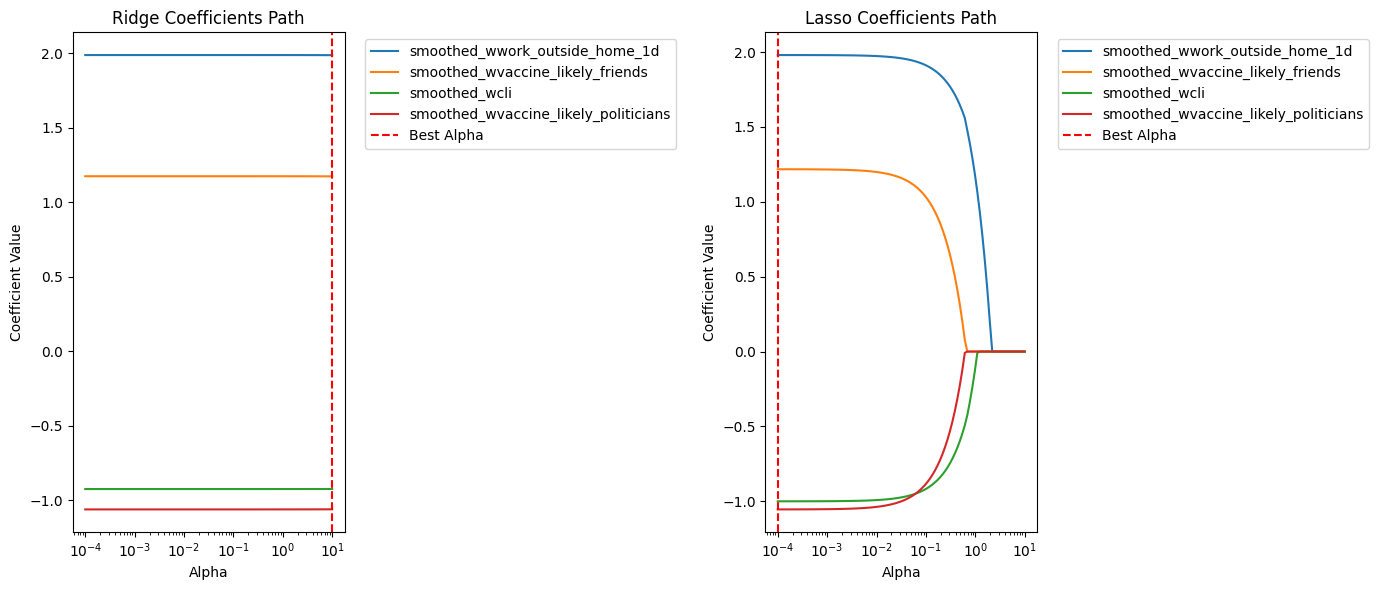

In [61]:
# Check which features Lasso selected (non-zero coefficients)
# Note: Since X_vac_train is scaled, we need to use the original feature names
selected_vaccination_features = vaccine_features_selected.drop(columns=['smoothed_wcovid_vaccinated']).columns
lasso_coef = pd.Series(best_lasso.coef_, index=selected_vaccination_features)
selected_features_lasso = lasso_coef[lasso_coef != 0].index.tolist()
print(f"\nFeatures selected by Lasso: {selected_features_lasso}")
print(f"Number of features selected: {len(selected_features_lasso)}")

# Visualize the ridge and lasso paths
from sklearn.linear_model import lasso_path
from sklearn.linear_model import Ridge

# Ridge path
alphas_ridge = np.logspace(-4, 1, 100)
coefs_ridge = []
for alpha in alphas_ridge:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_vac_train, y_vac_train)
    coefs_ridge.append(ridge.coef_)

# Lasso path
alphas_lasso = np.logspace(-4, 1, 100)
alphas_lasso, coefs_lasso, _ = lasso_path(X_vac_train, y_vac_train, alphas=alphas_lasso)

# Plot Ridge coefficients path
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for i, feature in enumerate(selected_vaccination_features):
    plt.plot(alphas_ridge, [coef[i] for coef in coefs_ridge], label=feature)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients Path')
plt.axvline(ridge_grid.best_params_['alpha'], color='r', linestyle='--', label='Best Alpha')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Lasso coefficients path
plt.subplot(1, 2, 2)
for i, feature in enumerate(selected_vaccination_features):
    plt.plot(alphas_lasso, coefs_lasso[i], label=feature)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients Path')
plt.axvline(lasso_grid.best_params_['alpha'], color='r', linestyle='--', label='Best Alpha')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Visualize all model results

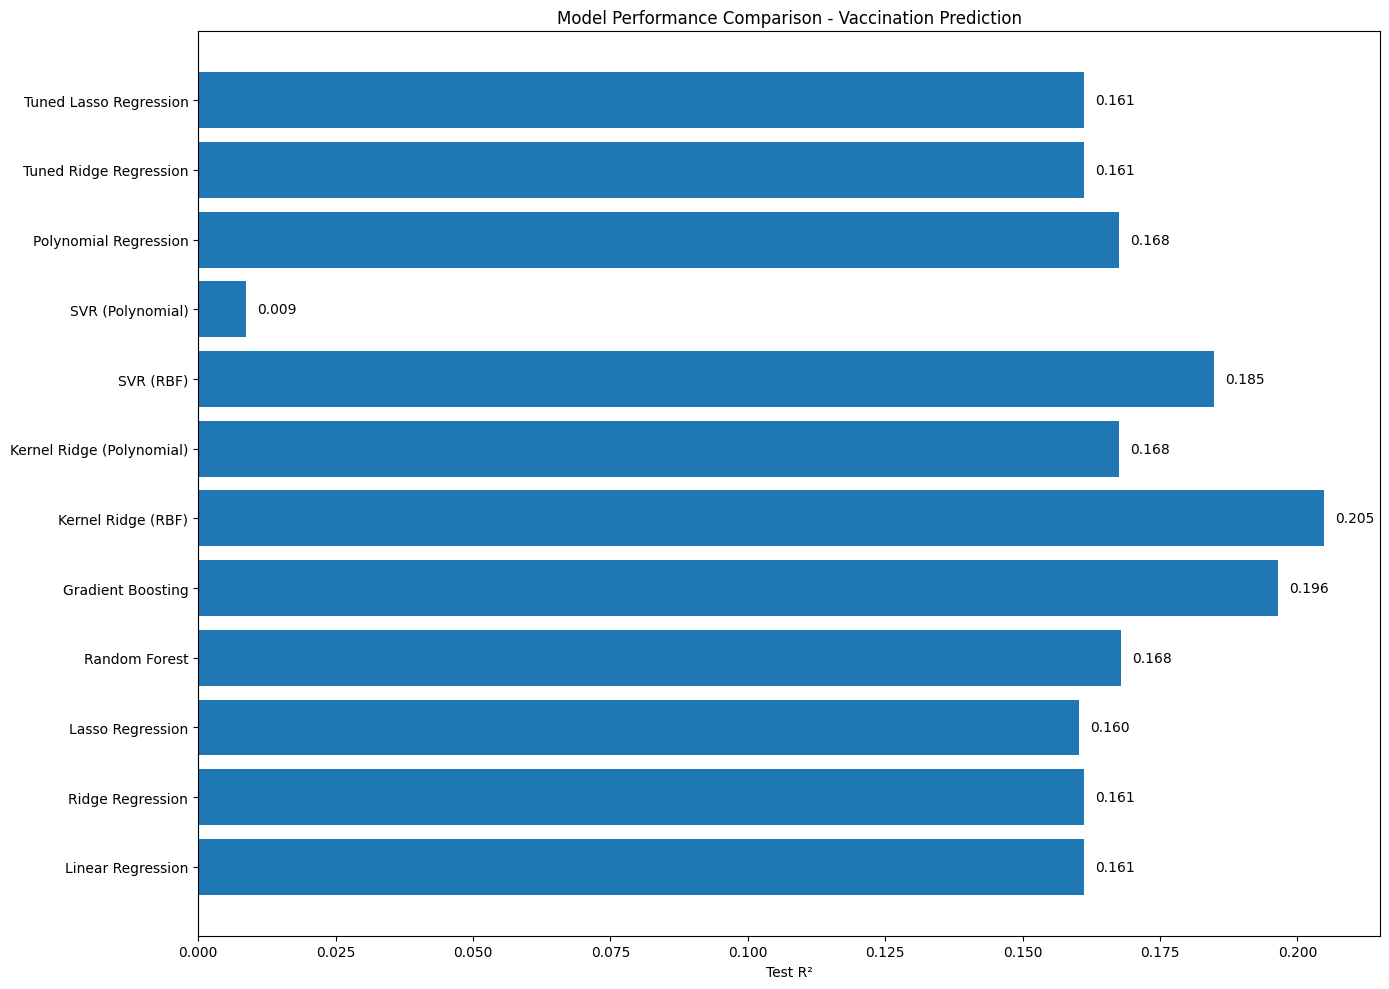

In [62]:
plt.figure(figsize=(14, 10))
model_names = list(model_results['vaccination'].keys())
test_r2_values = [model_results['vaccination'][name]['test_r2'] for name in model_names]

bars = plt.barh(model_names, test_r2_values)
plt.xlabel('Test R²')
plt.title('Model Performance Comparison - Vaccination Prediction')

# Add value labels
for bar, value in zip(bars, test_r2_values):
    if value >= 0:
        plt.text(value + 0.002, bar.get_y() + bar.get_height()/2, f'{value:.3f}',
                va='center', ha='left')
    else:
        plt.text(value - 0.002, bar.get_y() + bar.get_height()/2, f'{value:.3f}',
                va='center', ha='right')

plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

## Positive Test analysis

In [20]:
behavioral_indicators = ['smoothed_wwearing_mask', 'smoothed_wothers_masked', 'smoothed_wwork_outside_home_1d','smoothed_wlarge_event_1d'\
                     , 'smoothed_wrestaurant_1d', 'smoothed_wshop_1d', 'smoothed_wspent_time_1d','smoothed_wpublic_transit_1d'\
                     ,'smoothed_wtested_positive_14d','smoothed_wcli','smoothed_wtested_14d']

tested_positive_data = covid_data[behavioral_indicators]

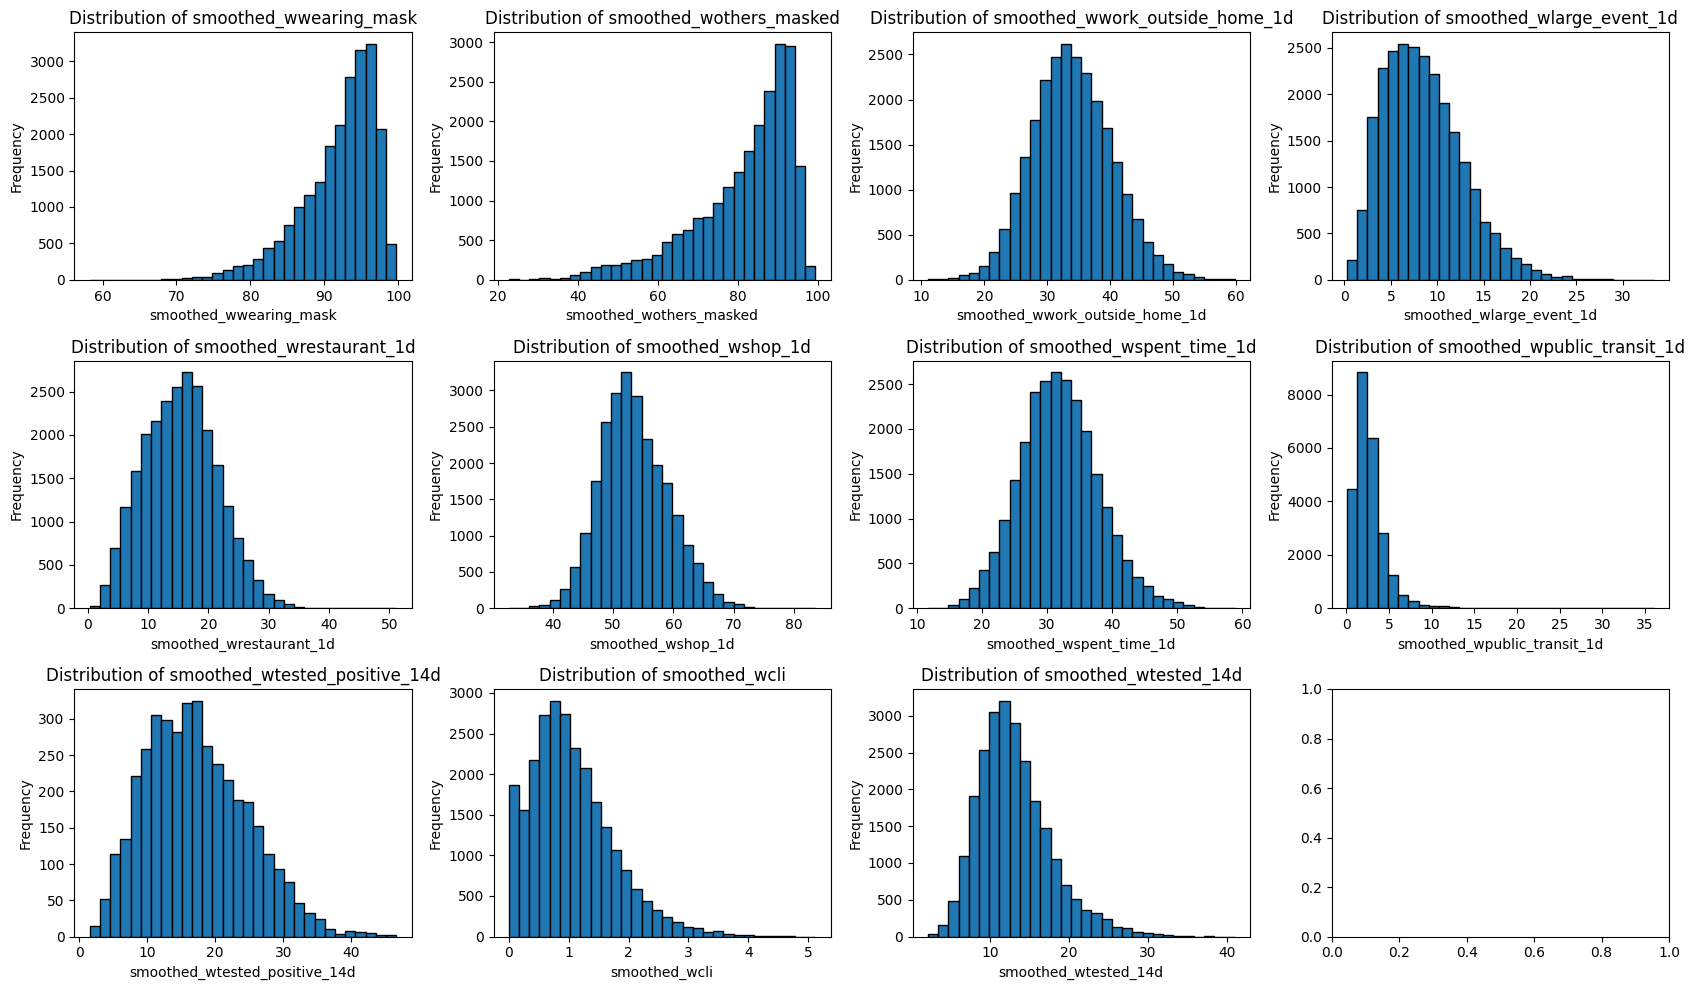

In [22]:
# Analyze data distribution of all attributes
fig, axes = plt.subplots(3, 4, figsize=(17, 10))
axes = axes.ravel()
for i, col in enumerate(behavioral_indicators):
    if i < len(axes):
        axes[i].hist(tested_positive_data[col], bins=30, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### Calculate correlation between independent variables and target variable smoothed_wtested_positive_14d

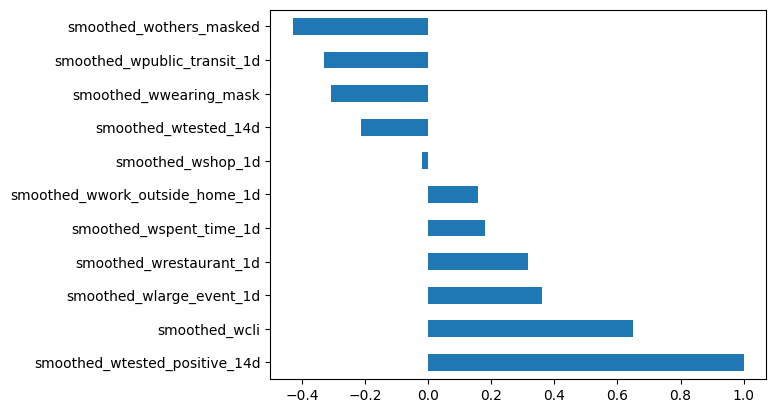

smoothed_wtested_positive_14d     1.000000
smoothed_wcli                     0.648732
smoothed_wlarge_event_1d          0.362002
smoothed_wrestaurant_1d           0.317185
smoothed_wspent_time_1d           0.179642
smoothed_wwork_outside_home_1d    0.156681
smoothed_wshop_1d                -0.019531
smoothed_wtested_14d             -0.213297
smoothed_wwearing_mask           -0.308142
smoothed_wpublic_transit_1d      -0.330947
smoothed_wothers_masked          -0.428724
Name: smoothed_wtested_positive_14d, dtype: float64


In [23]:
corr_matrix_2 = tested_positive_data.corr()
corr_matrix_2['smoothed_wtested_positive_14d'].sort_values(ascending=False).plot(kind="barh")
plt.show()
print(corr_matrix_2['smoothed_wtested_positive_14d'].sort_values(ascending=False))

In [24]:
# Choose all features except smoothed_wshop_1d
tested_positive_data_selected = tested_positive_data.drop(columns=['smoothed_wshop_1d'])

In [25]:
# Calculate null share
null_share_2 = round(tested_positive_data_selected.isna().sum()/tested_positive_data_selected.shape[0],2)
print(null_share_2.sort_values(ascending=False))

smoothed_wtested_positive_14d     0.84
smoothed_wwearing_mask            0.14
smoothed_wothers_masked           0.14
smoothed_wtested_14d              0.04
smoothed_wwork_outside_home_1d    0.02
smoothed_wlarge_event_1d          0.02
smoothed_wspent_time_1d           0.02
smoothed_wrestaurant_1d           0.02
smoothed_wpublic_transit_1d       0.02
smoothed_wcli                     0.01
dtype: float64


In [26]:
# I'm gonna handle missing values based on percentage
for column in tested_positive_data_selected.columns:
    if null_share_2[column] < 0.05:
        tested_positive_data_selected[column].fillna(tested_positive_data_selected[column].median(), inplace=True)

    elif null_share_2[column] > 0.8:
       # Use median and add some noise
        median_val = tested_positive_data_selected[column].median()
        std_val = tested_positive_data_selected[column].std()
        missing_mask = tested_positive_data_selected[column].isnull()

        # Fill with median + small random noise
        noise = np.random.normal(0, std_val * 0.1, missing_mask.sum())
        tested_positive_data_selected.loc[missing_mask, column] = median_val + noise
    else:
        tested_positive_data_selected[column].fillna(tested_positive_data_selected[column].mean(), inplace=True)

null_share_updated_2 = round(tested_positive_data_selected.isna().sum()/tested_positive_data_selected.shape[0],2)
print(null_share_updated_2.sort_values(ascending=False))

smoothed_wwearing_mask            0.0
smoothed_wothers_masked           0.0
smoothed_wwork_outside_home_1d    0.0
smoothed_wlarge_event_1d          0.0
smoothed_wrestaurant_1d           0.0
smoothed_wspent_time_1d           0.0
smoothed_wpublic_transit_1d       0.0
smoothed_wtested_positive_14d     0.0
smoothed_wcli                     0.0
smoothed_wtested_14d              0.0
dtype: float64


<ipython-input-26-5289644c6610>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tested_positive_data_selected[column].fillna(tested_positive_data_selected[column].mean(), inplace=True)
<ipython-input-26-5289644c6610>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

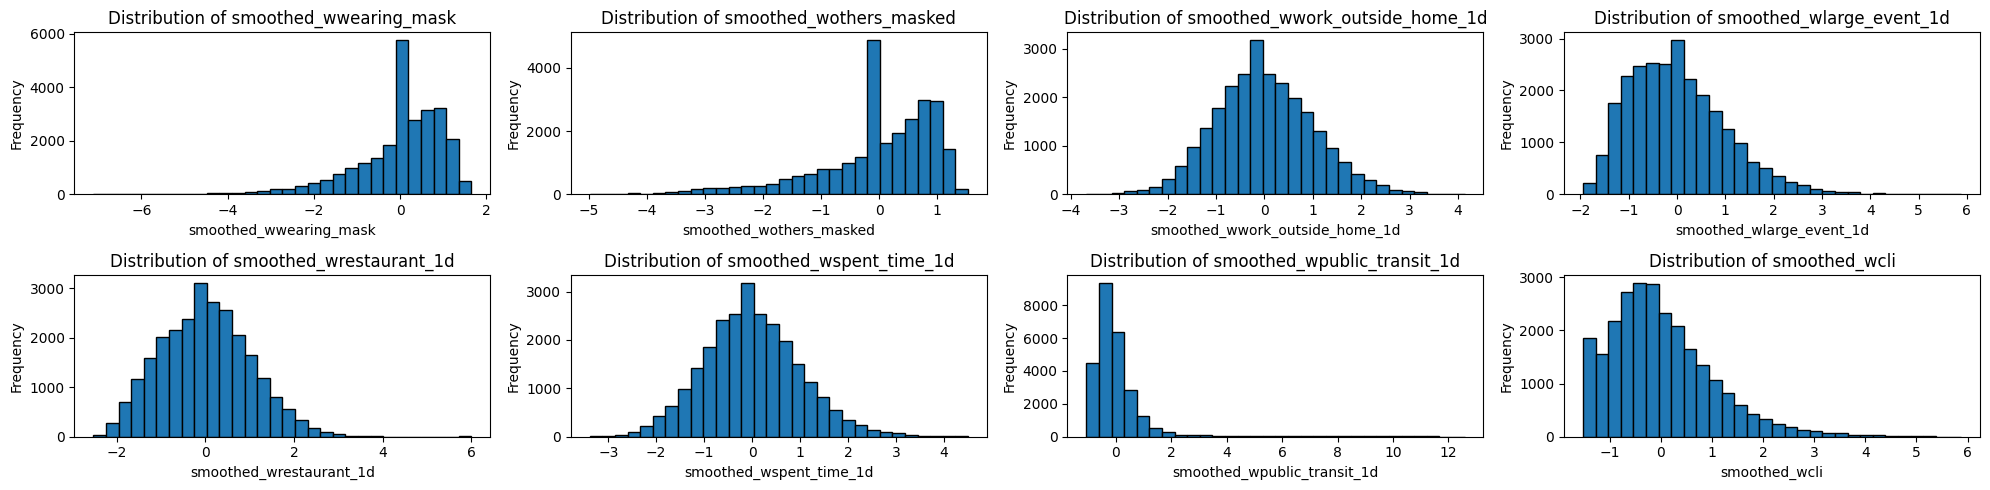

In [41]:
## Scale and normalize only input features
tested_positive_data_selected_ip = tested_positive_data_selected.drop(columns=['smoothed_wtested_positive_14d'])
scaler = StandardScaler()
tested_positive_data_selected_scaled = scaler.fit_transform(tested_positive_data_selected_ip)
tested_positive_data_selected_scaled = pd.DataFrame(tested_positive_data_selected_scaled, columns=tested_positive_data_selected_ip.columns)

## Plot the histogram of them all
fig, axes = plt.subplots(2, 4, figsize=(20, 5))
axes = axes.ravel()
for i, col in enumerate(tested_positive_data_selected_scaled.columns):
    if i < len(axes):
        axes[i].hist(tested_positive_data_selected_scaled[col], bins=30, edgecolor='black')
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

### Modeling for positive rate

In [43]:
# Train test split as 80:20
X2 = tested_positive_data_selected_scaled
y2 = tested_positive_data_selected['smoothed_wtested_positive_14d']
X_pos_train, X_pos_test, y_pos_train, y_pos_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [44]:
# Regression models for positive cases
models_positive = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
    # 'Neural Network': MLPRegressor(hidden_layer_sizes=(50, 30), max_iter=1000, random_state=42)
}

# Add kernel methods to models_vaccination
models_positive.update({
    'Kernel Ridge (RBF)': KernelRidge(kernel='rbf', alpha=1.0),
    'Kernel Ridge (Polynomial)': KernelRidge(kernel='poly', degree=2, alpha=1.0),
    'SVR (RBF)': SVR(kernel='rbf', C=1.0),
    'SVR (Polynomial)': SVR(kernel='poly', degree=2, C=1.0),
    'Polynomial Regression': Pipeline([
        ('poly', PolynomialFeatures(degree=2)),
        ('linear', LinearRegression())
    ])
})

In [71]:
# Evaluate models for positive cases
print("\n===== Positive Cases Prediction Results =====")
for name, model in models_positive.items():
    results, trained_model = evaluate_model(model, X_pos_train, y_pos_train, X_pos_test, y_pos_test)
    model_results['positive_cases'][name] = results

    print(f"\n{name}:")
    print(f"CV RMSE: {results['cv_rmse_mean']:.3f} ± {results['cv_rmse_std']:.3f}")
    print(f"Train RMSE: {results['train_rmse']:.3f}")
    print(f"Test RMSE: {results['test_rmse']:.3f}")
    print(f"Train R²: {results['train_r2']:.3f}")
    print(f"Test R²: {results['test_r2']:.3f}")


===== Positive Cases Prediction Results =====

Linear Regression:
CV RMSE: 2.873 ± 0.062
Train RMSE: 2.873
Test RMSE: 2.848
Train R²: 0.098
Test R²: 0.094

Ridge Regression:
CV RMSE: 2.873 ± 0.062
Train RMSE: 2.873
Test RMSE: 2.848
Train R²: 0.098
Test R²: 0.094

Lasso Regression:
CV RMSE: 2.884 ± 0.060
Train RMSE: 2.884
Test RMSE: 2.856
Train R²: 0.091
Test R²: 0.089

Random Forest:
CV RMSE: 2.226 ± 0.073
Train RMSE: 0.841
Test RMSE: 2.131
Train R²: 0.923
Test R²: 0.493

Gradient Boosting:
CV RMSE: 2.622 ± 0.071
Train RMSE: 2.537
Test RMSE: 2.594
Train R²: 0.296
Test R²: 0.249

Kernel Ridge (RBF):
CV RMSE: 2.560 ± 0.063
Train RMSE: 2.480
Test RMSE: 2.528
Train R²: 0.327
Test R²: 0.287

Kernel Ridge (Polynomial):
CV RMSE: 2.800 ± 0.062
Train RMSE: 2.795
Test RMSE: 2.780
Train R²: 0.146
Test R²: 0.137

SVR (RBF):
CV RMSE: 2.787 ± 0.071
Train RMSE: 2.758
Test RMSE: 2.749
Train R²: 0.168
Test R²: 0.156

SVR (Polynomial):
CV RMSE: 2.931 ± 0.061
Train RMSE: 2.931
Test RMSE: 2.909
Train R²:

In [72]:
model_results['positive_cases']

{'Tuned Ridge Regression': {'cv_rmse_mean': np.float64(2.8732739131485188),
  'cv_rmse_std': np.float64(0.06149820066508833),
  'train_rmse': np.float64(2.8726164299844092),
  'test_rmse': np.float64(2.848038635029989),
  'train_mae': 1.5702365226788184,
  'test_mae': 1.5617379844307695,
  'train_r2': 0.09751900233707955,
  'test_r2': 0.0942217403113692},
 'Tuned Lasso Regression': {'cv_rmse_mean': np.float64(2.873272592891166),
  'cv_rmse_std': np.float64(0.0615006850292406),
  'train_rmse': np.float64(2.8726163835495706),
  'test_rmse': np.float64(2.8480415863841873),
  'train_mae': 1.5703126589811565,
  'test_mae': 1.5618080055647612,
  'train_r2': 0.09751903151365793,
  'test_r2': 0.09421986303778052},
 'Tuned Random Forest': {'cv_rmse_mean': np.float64(2.218533501707059),
  'cv_rmse_std': np.float64(0.07526578365766794),
  'train_rmse': np.float64(0.8288080034996169),
  'test_rmse': np.float64(2.122324255097921),
  'train_mae': 0.46585170335069803,
  'test_mae': 1.224092890060362,

### Hyperparameter Tuning for Best Models

In [63]:
# Tune Ridge Regression
ridge_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
}

ridge_grid = GridSearchCV(Ridge(),
                         ridge_param_grid,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1)
ridge_grid.fit(X_vac_train, y_vac_train)

print("\n===== Tuned Ridge Regression Results =====")
best_ridge = ridge_grid.best_estimator_
results_ridge, _ = evaluate_model(best_ridge, X_pos_train, y_pos_train, X_pos_test, y_pos_test)
model_results['positive_cases']['Tuned Ridge Regression'] = results_ridge

print(f"Best alpha: {ridge_grid.best_params_['alpha']}")
print(f"Test RMSE: {results_ridge['test_rmse']:.3f}")
print(f"Test R²: {results_ridge['test_r2']:.3f}")

# Tune Lasso Regression
lasso_param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
}

lasso_grid = GridSearchCV(Lasso(max_iter=10000),
                         lasso_param_grid,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         n_jobs=-1)
lasso_grid.fit(X_vac_train, y_vac_train)

print("\n===== Tuned Lasso Regression Results =====")
best_lasso = lasso_grid.best_estimator_
results_lasso, _ = evaluate_model(best_lasso, X_pos_train, y_pos_train, X_pos_test, y_pos_test)
model_results['positive_cases']['Tuned Lasso Regression'] = results_lasso

print(f"Best alpha: {lasso_grid.best_params_['alpha']}")
print(f"Test RMSE: {results_lasso['test_rmse']:.3f}")
print(f"Test R²: {results_lasso['test_r2']:.3f}")


===== Tuned Ridge Regression Results =====
Best alpha: 10.0
Test RMSE: 2.848
Test R²: 0.094

===== Tuned Lasso Regression Results =====
Best alpha: 0.0001
Test RMSE: 2.848
Test R²: 0.094


In [64]:
# Tune Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42),
                       rf_param_grid,
                       cv=5,
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)
rf_grid.fit(X_pos_train, y_pos_train)

print("\n===== Tuned Random Forest Results =====")
best_rf = rf_grid.best_estimator_
results_rf, _ = evaluate_model(best_rf, X_pos_train, y_pos_train, X_pos_test, y_pos_test)
model_results['positive_cases']['Tuned Random Forest'] = results_rf

print(f"Best parameters: {rf_grid.best_params_}")
print(f"Test RMSE: {results_rf['test_rmse']:.3f}")
print(f"Test R²: {results_rf['test_r2']:.3f}")

# Tune Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

gb_grid = GridSearchCV(GradientBoostingRegressor(random_state=42),
                       gb_param_grid,
                       cv=5,
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)
gb_grid.fit(X_vac_train, y_vac_train)

print("\n===== Tuned Gradient Boosting Results =====")
best_gb = gb_grid.best_estimator_
results_gb, _ = evaluate_model(best_gb, X_pos_train, y_pos_train, X_pos_test, y_pos_test)
model_results['positive_cases']['Tuned Gradient Boosting'] = results_gb

print(f"Best parameters: {gb_grid.best_params_}")
print(f"Test RMSE: {results_gb['test_rmse']:.3f}")
print(f"Test R²: {results_gb['test_r2']:.3f}")


===== Tuned Random Forest Results =====
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test RMSE: 2.122
Test R²: 0.497

===== Tuned Gradient Boosting Results =====
Best parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 200}
Test RMSE: 2.451
Test R²: 0.329


In [68]:
model_results

{'positive_cases': {'Tuned Ridge Regression': {'cv_rmse_mean': np.float64(2.8732739131485188),
   'cv_rmse_std': np.float64(0.06149820066508833),
   'train_rmse': np.float64(2.8726164299844092),
   'test_rmse': np.float64(2.848038635029989),
   'train_mae': 1.5702365226788184,
   'test_mae': 1.5617379844307695,
   'train_r2': 0.09751900233707955,
   'test_r2': 0.0942217403113692},
  'Tuned Lasso Regression': {'cv_rmse_mean': np.float64(2.873272592891166),
   'cv_rmse_std': np.float64(0.0615006850292406),
   'train_rmse': np.float64(2.8726163835495706),
   'test_rmse': np.float64(2.8480415863841873),
   'train_mae': 1.5703126589811565,
   'test_mae': 1.5618080055647612,
   'train_r2': 0.09751903151365793,
   'test_r2': 0.09421986303778052},
  'Tuned Random Forest': {'cv_rmse_mean': np.float64(2.218533501707059),
   'cv_rmse_std': np.float64(0.07526578365766794),
   'train_rmse': np.float64(0.8288080034996169),
   'test_rmse': np.float64(2.122324255097921),
   'train_mae': 0.465851703350

In [73]:
model_results_2 = {'positive_cases': {'Tuned Ridge Regression': {'cv_rmse_mean': np.float64(2.8732739131485188),
   'cv_rmse_std': np.float64(0.06149820066508833),
   'train_rmse': np.float64(2.8726164299844092),
   'test_rmse': np.float64(2.848038635029989),
   'train_mae': 1.5702365226788184,
   'test_mae': 1.5617379844307695,
   'train_r2': 0.09751900233707955,
   'test_r2': 0.0942217403113692},
  'Tuned Lasso Regression': {'cv_rmse_mean': np.float64(2.873272592891166),
   'cv_rmse_std': np.float64(0.0615006850292406),
   'train_rmse': np.float64(2.8726163835495706),
   'test_rmse': np.float64(2.8480415863841873),
   'train_mae': 1.5703126589811565,
   'test_mae': 1.5618080055647612,
   'train_r2': 0.09751903151365793,
   'test_r2': 0.09421986303778052},
  'Tuned Random Forest': {'cv_rmse_mean': np.float64(2.218533501707059),
   'cv_rmse_std': np.float64(0.07526578365766794),
   'train_rmse': np.float64(0.8288080034996169),
   'test_rmse': np.float64(2.122324255097921),
   'train_mae': 0.46585170335069803,
   'test_mae': 1.224092890060362,
   'train_r2': 0.9248739320736988,
   'test_r2': 0.49701664348724506},
  'Tuned Gradient Boosting': {'cv_rmse_mean': np.float64(2.485782000829661),
   'cv_rmse_std': np.float64(0.07236805936321014),
   'train_rmse': np.float64(2.2170857894187344),
   'test_rmse': np.float64(2.450976217570202),
   'train_mae': 1.2701637688947494,
   'test_mae': 1.3887408695413082,
   'train_r2': 0.46241420719693227,
   'test_r2': 0.32917639809608734}},
 'vaccination': {'Linear Regression': {'cv_rmse_mean': np.float64(5.742738868117409),
   'cv_rmse_std': np.float64(0.05216063055560492),
   'train_rmse': np.float64(5.741002118394999),
   'test_rmse': np.float64(5.761552036091318),
   'train_mae': 4.51523698960938,
   'test_mae': 4.521649189663651,
   'train_r2': 0.1761469034493104,
   'test_r2': 0.16120329339979145},
  'Ridge Regression': {'cv_rmse_mean': np.float64(5.742738763491271),
   'cv_rmse_std': np.float64(0.05216131176793901),
   'train_rmse': np.float64(5.741002120108261),
   'test_rmse': np.float64(5.761549830852594),
   'train_mae': 4.515237310379088,
   'test_mae': 4.521649904182825,
   'train_r2': 0.1761469029575925,
   'test_r2': 0.16120393549991063},
  'Lasso Regression': {'cv_rmse_mean': np.float64(5.74716258011539),
   'cv_rmse_std': np.float64(0.052375462545531715),
   'train_rmse': np.float64(5.745422842591324),
   'test_rmse': np.float64(5.765000885221155),
   'train_mae': 4.518136974044704,
   'test_mae': 4.5272201395868565,
   'train_r2': 0.174877637397178,
   'test_r2': 0.16019879006127646},
  'Random Forest': {'cv_rmse_mean': np.float64(5.702093825322434),
   'cv_rmse_std': np.float64(0.032744786537340094),
   'train_rmse': np.float64(2.1271645213174724),
   'test_rmse': np.float64(5.7383395997471425),
   'train_mae': 1.6398041051182894,
   'test_mae': 4.45380736133546,
   'train_r2': 0.8868963746234338,
   'test_r2': 0.1679484527356443},
  'Gradient Boosting': {'cv_rmse_mean': np.float64(5.6057880598067005),
   'cv_rmse_std': np.float64(0.05389251531067453),
   'train_rmse': np.float64(5.497874299227925),
   'test_rmse': np.float64(5.639132261406809),
   'train_mae': 4.295099166658673,
   'test_mae': 4.408788711628146,
   'train_r2': 0.24444866654694597,
   'test_r2': 0.19646962077869168},
  'Kernel Ridge (RBF)': {'cv_rmse_mean': np.float64(5.588134092129641),
   'cv_rmse_std': np.float64(0.05326361341950962),
   'train_rmse': np.float64(5.524717418768996),
   'test_rmse': np.float64(5.60991847265265),
   'train_mae': 4.301324552973304,
   'test_mae': 4.3652039681692525,
   'train_r2': 0.23705276585886792,
   'test_r2': 0.20477350909366676},
  'Kernel Ridge (Polynomial)': {'cv_rmse_mean': np.float64(5.7134263786680455),
   'cv_rmse_std': np.float64(0.0553675697386481),
   'train_rmse': np.float64(5.7095501710677885),
   'test_rmse': np.float64(5.739616745328637),
   'train_mae': 4.479689396162662,
   'test_mae': 4.497093483572483,
   'train_r2': 0.18514909683295466,
   'test_r2': 0.16757804272682297},
  'SVR (RBF)': {'cv_rmse_mean': np.float64(5.653310115502336),
   'cv_rmse_std': np.float64(0.062317958927764025),
   'train_rmse': np.float64(5.620221050955005),
   'test_rmse': np.float64(5.679886777274721),
   'train_mae': 4.2636621031276105,
   'test_mae': 4.333208297991178,
   'train_r2': 0.2104472350358748,
   'test_r2': 0.18481327912901013},
  'SVR (Polynomial)': {'cv_rmse_mean': np.float64(6.2859863931144755),
   'cv_rmse_std': np.float64(0.07317688339009047),
   'train_rmse': np.float64(6.2851031040113226),
   'test_rmse': np.float64(6.263512130129681),
   'train_mae': 4.847287219473729,
   'test_mae': 4.862491530445904,
   'train_r2': 0.012586235239861021,
   'test_r2': 0.008680646375409218},
  'Polynomial Regression': {'cv_rmse_mean': np.float64(5.713428975634249),
   'cv_rmse_std': np.float64(0.05534585630185755),
   'train_rmse': np.float64(5.709550052782292),
   'test_rmse': np.float64(5.739613303568664),
   'train_mae': 4.4797565143422915,
   'test_mae': 4.497130921969791,
   'train_r2': 0.18514913059569937,
   'test_r2': 0.16757904104982646},
  'Tuned Ridge Regression': {'cv_rmse_mean': np.float64(5.742738063455555),
   'cv_rmse_std': np.float64(0.05216745129360333),
   'train_rmse': np.float64(5.741002289532321),
   'test_rmse': np.float64(5.761530143986169),
   'train_mae': 4.515240420099319,
   'test_mae': 4.5216563216194,
   'train_r2': 0.17614685433174782,
   'test_r2': 0.16120966772070278},
  'Tuned Lasso Regression': {'cv_rmse_mean': np.float64(5.742738872126326),
   'cv_rmse_std': np.float64(0.05216067653210167),
   'train_rmse': np.float64(5.741002122851654),
   'test_rmse': np.float64(5.761551005573122),
   'train_mae': 4.515237721668417,
   'test_mae': 4.521652089371923,
   'train_r2': 0.17614690217022044,
   'test_r2': 0.1612035934561602}}}

In [75]:
## Update model results with content of model results 2
model_results['positive_cases'].update(model_results_2['positive_cases'])
model_results['positive_cases']

{'Tuned Ridge Regression': {'cv_rmse_mean': np.float64(2.8732739131485188),
  'cv_rmse_std': np.float64(0.06149820066508833),
  'train_rmse': np.float64(2.8726164299844092),
  'test_rmse': np.float64(2.848038635029989),
  'train_mae': 1.5702365226788184,
  'test_mae': 1.5617379844307695,
  'train_r2': 0.09751900233707955,
  'test_r2': 0.0942217403113692},
 'Tuned Lasso Regression': {'cv_rmse_mean': np.float64(2.873272592891166),
  'cv_rmse_std': np.float64(0.0615006850292406),
  'train_rmse': np.float64(2.8726163835495706),
  'test_rmse': np.float64(2.8480415863841873),
  'train_mae': 1.5703126589811565,
  'test_mae': 1.5618080055647612,
  'train_r2': 0.09751903151365793,
  'test_r2': 0.09421986303778052},
 'Tuned Random Forest': {'cv_rmse_mean': np.float64(2.218533501707059),
  'cv_rmse_std': np.float64(0.07526578365766794),
  'train_rmse': np.float64(0.8288080034996169),
  'test_rmse': np.float64(2.122324255097921),
  'train_mae': 0.46585170335069803,
  'test_mae': 1.224092890060362,

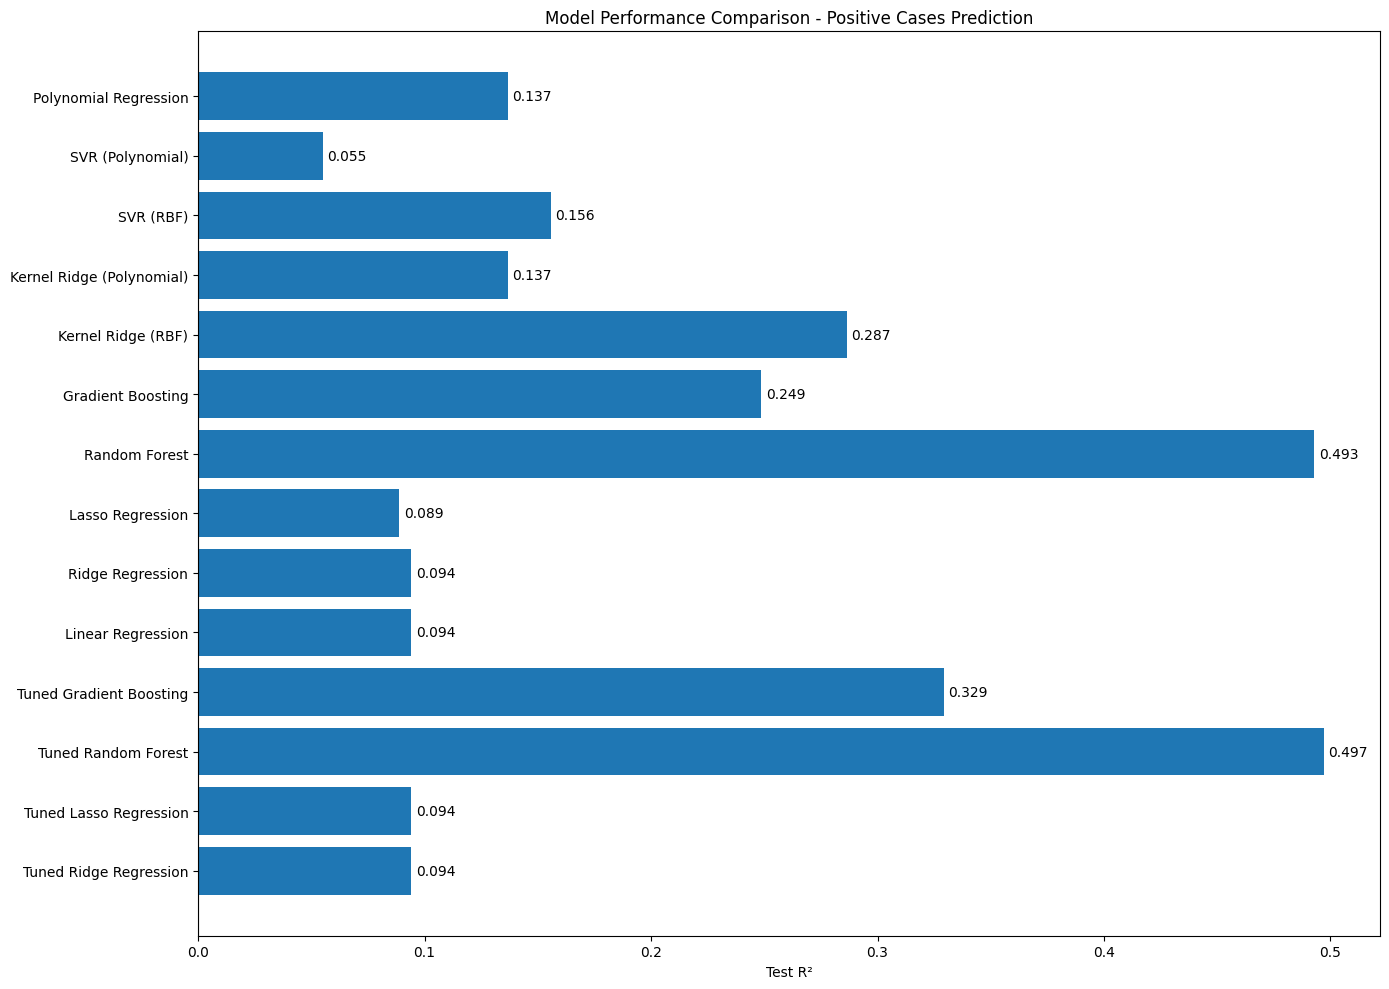

In [76]:
# Visualize all model results
plt.figure(figsize=(14, 10))
model_names = list(model_results['positive_cases'].keys())
test_r2_values = [model_results['positive_cases'][name]['test_r2'] for name in model_names]

bars = plt.barh(model_names, test_r2_values)
plt.xlabel('Test R²')
plt.title('Model Performance Comparison - Positive Cases Prediction')

# Add value labels
for bar, value in zip(bars, test_r2_values):
    if value >= 0:
        plt.text(value + 0.002, bar.get_y() + bar.get_height()/2, f'{value:.3f}',
                va='center', ha='left')
    else:
        plt.text(value - 0.002, bar.get_y() + bar.get_height()/2, f'{value:.3f}',
                va='center', ha='right')

plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()

## Policy Analysis

### Create a merged dataset to analyze the relationship between vaccination and positive cases

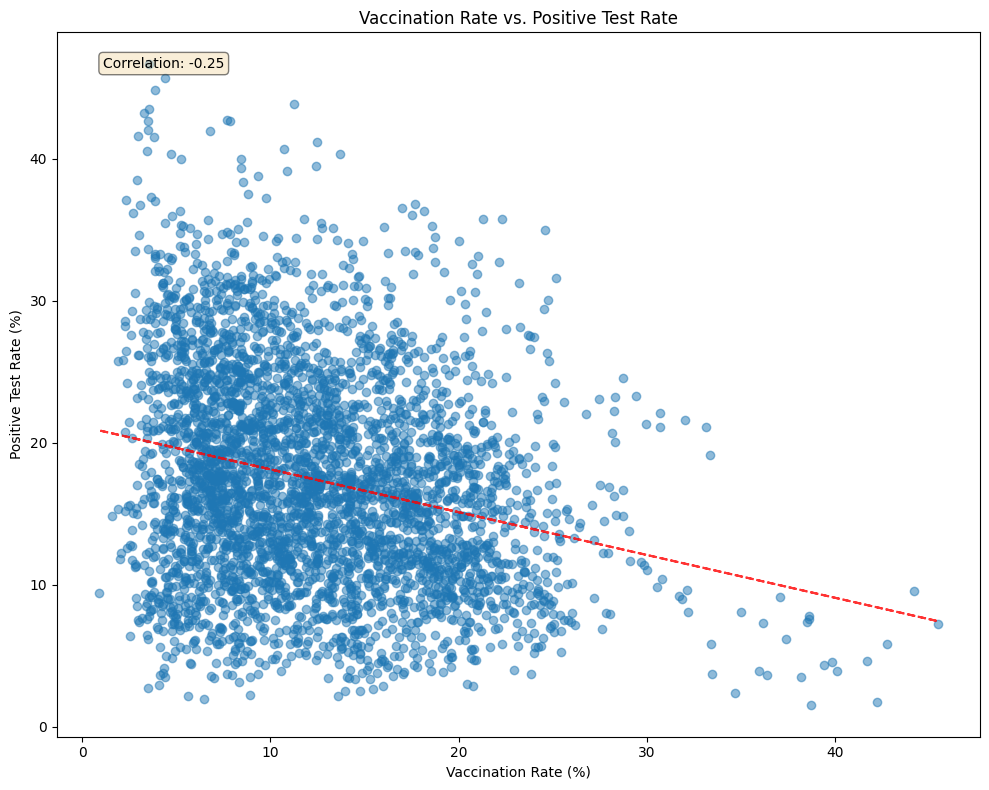

In [77]:
target_vaccination = 'smoothed_wcovid_vaccinated'
target_positive_tests = 'smoothed_wtested_positive_14d'
policy_df = covid_data[[target_vaccination, target_positive_tests]].dropna()

# Scatter plot of vaccination vs positive cases
plt.figure(figsize=(10, 8))
plt.scatter(policy_df[target_vaccination], policy_df[target_positive_tests], alpha=0.5)
plt.xlabel('Vaccination Rate (%)')
plt.ylabel('Positive Test Rate (%)')
plt.title('Vaccination Rate vs. Positive Test Rate')

# Add trend line
z = np.polyfit(policy_df[target_vaccination], policy_df[target_positive_tests], 1)
p = np.poly1d(z)
plt.plot(policy_df[target_vaccination], p(policy_df[target_vaccination]), "r--", alpha=0.8)

correlation = policy_df[target_vaccination].corr(policy_df[target_positive_tests])
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round", facecolor="wheat", alpha=0.5))

plt.tight_layout()
plt.show()

## Behavior and Belief Analysis

### Analyze key behaviors affecting positive test rates

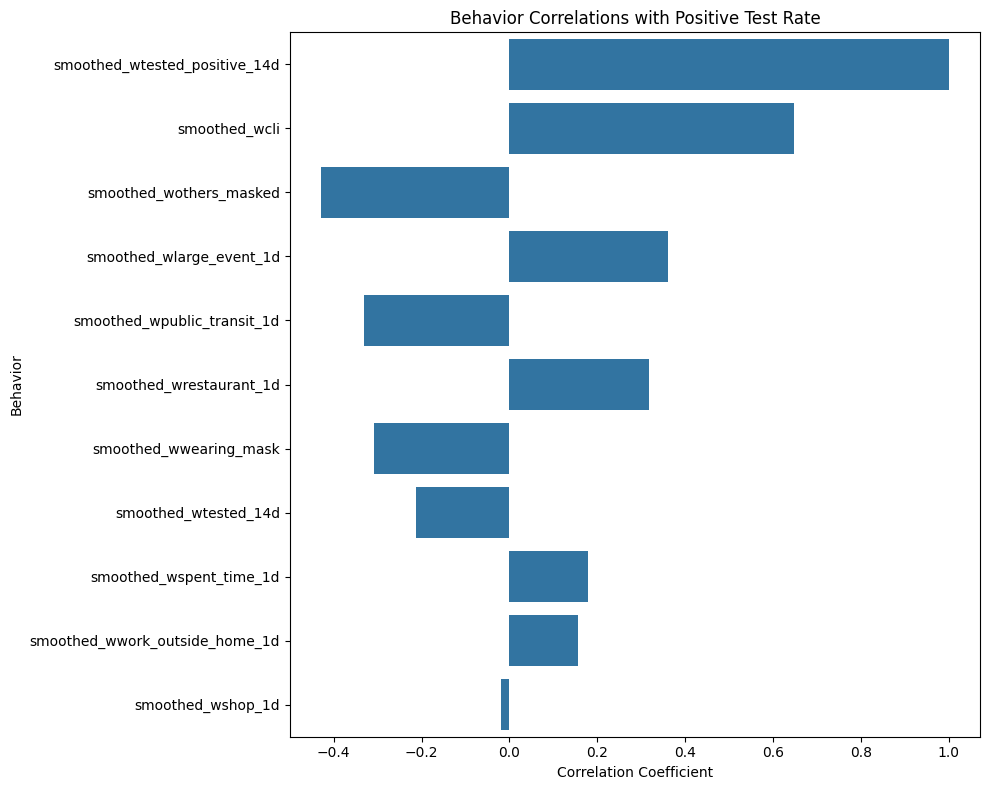

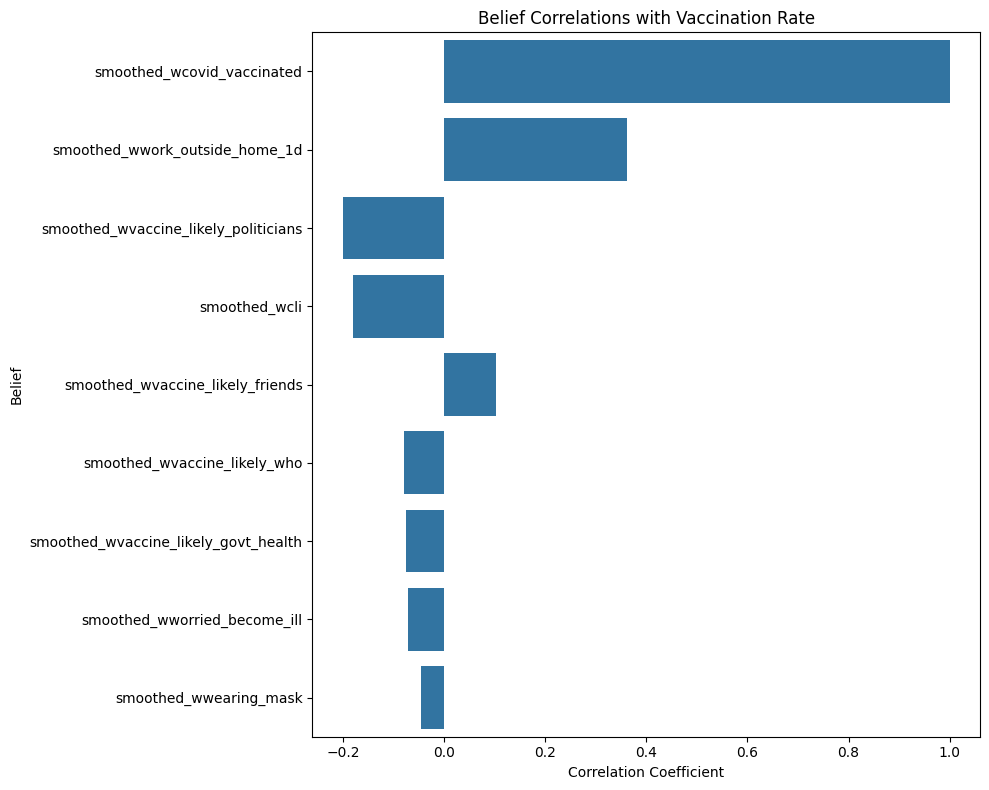

In [37]:
behavior_impact = pd.DataFrame()
for behavior in behavioral_indicators:
    if behavior in tested_positive_data.columns:
        corr = tested_positive_data[behavior].corr(tested_positive_data[target_positive_tests])
        # Create a temporary DataFrame for the current behavior
        temp_df = pd.DataFrame({'Behavior': [behavior], 'Correlation': [corr]})
        # Concatenate with the main DataFrame
        behavior_impact = pd.concat([behavior_impact, temp_df], ignore_index=True)

behavior_impact = behavior_impact.sort_values('Correlation', key=abs, ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=behavior_impact, x='Correlation', y='Behavior')
plt.title('Behavior Correlations with Positive Test Rate')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Analyze key beliefs affecting vaccination
belief_impact = pd.DataFrame()
for belief in belief_indicators:
    if belief in vaccine_data.columns:
        corr = vaccine_data[belief].corr(vaccine_data[target_vaccination])
        # Create a temporary DataFrame for the current behavior
        temp_df_2 = pd.DataFrame({'Belief': [belief], 'Correlation': [corr]})
        # Concatenate with the main DataFrame
        belief_impact = pd.concat([belief_impact, temp_df_2], ignore_index=True)

belief_impact = belief_impact.sort_values('Correlation', key=abs, ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(data=belief_impact, x='Correlation', y='Belief')
plt.title('Belief Correlations with Vaccination Rate')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()